# **Predicting a Cancerous Thyroid Nodule  by Applying Data Balancing Techniques and Machine Learning Algorithms**





# **Importing Libraries and Dataset**


Importing required libraries


In [115]:
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
import kagglehub
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

Importing dataset from Kaggle and Storing it in a DataFrame


In [116]:
#https://www.kaggle.com/datasets/ankushpanday1/thyroid-cancer-risk-prediction-dataset
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("ankushpanday1/thyroid-cancer-risk-prediction-dataset")
df=pd.read_csv(path+'/thyroid_cancer_risk_data.csv')
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [117]:
# Summary Statistics
df.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


In [118]:
#Column Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [119]:
# Check for null values
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Country,0
Ethnicity,0
Family_History,0
Radiation_Exposure,0
Iodine_Deficiency,0
Smoking,0
Obesity,0


# **Encoding the Dataset**

Performing one-hot encoding for the categorical variables


In [120]:
# the id is a unique value hence dropping the column
df.drop('Patient_ID',axis=1,inplace=True)

In [121]:
# starting the encoding
import pandas as pd

# Gender Encoding
# Female = 1, Others (Male) = 2
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 2)

# Yes/No Encoding: Yes = 1, No = 0
df = df.map(lambda x: {"Yes": 1, "No": 0}.get(x, x))

# Country Encoding with Mapping Display
original_countries = df['Country'].astype(str).str.strip()
country_keys = original_countries.unique()
country_map = {key: i+1 for i, key in enumerate(country_keys)}
df['Country'] = original_countries.map(country_map)

print("Country Encoding Map:")
for country, code in country_map.items():
    print(f"{country} → {code}")

# Ethnicity Encoding with Mapping Display
original_ethnicities = df['Ethnicity'].astype(str).str.strip()
ethnicity_keys = original_ethnicities.unique()
ethnicity_map = {key: i+1 for i, key in enumerate(ethnicity_keys)}
df['Ethnicity'] = original_ethnicities.map(ethnicity_map)

print("\n Ethnicity Encoding Map:")
for ethnicity, code in ethnicity_map.items():
    print(f"{ethnicity} → {code}")

# Thyroid_Cancer_Risk Encoding: Low = 1, Medium = 2, High = 3
def change_thyroid_risk(a):
    return {
        'Low': 1,
        'Medium': 2,
        'High': 3
    }.get(a, a)

df['Thyroid_Cancer_Risk'] = df['Thyroid_Cancer_Risk'].apply(change_thyroid_risk)


Country Encoding Map:
Russia → 1
Germany → 2
Nigeria → 3
India → 4
UK → 5
South Korea → 6
Brazil → 7
China → 8
Japan → 9
USA → 10

 Ethnicity Encoding Map:
Caucasian → 1
Hispanic → 2
Asian → 3
African → 4
Middle Eastern → 5


Country Encoding Map: Russia → 1 Germany → 2 Nigeria → 3 India → 4 UK → 5 South Korea → 6 Brazil → 7 China → 8 Japan → 9 USA → 10

Gender Encoding Map: Female → 1 Male → 2

Ethnicity Encoding Map: Caucasian → 1
Hispanic → 2
Asian → 3
African → 4
Middle Eastern → 5

Thyroid Cancer Risk Map: Low → 1  Medium → 2  High → 3

Anywhere in document: Yes → 1 No → 0

In [ ]:
#Check datatype of columns after encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  212691 non-null  int64  
 1   Gender               212691 non-null  int64  
 2   Country              212691 non-null  int64  
 3   Ethnicity            212691 non-null  int64  
 4   Family_History       212691 non-null  int64  
 5   Radiation_Exposure   212691 non-null  int64  
 6   Iodine_Deficiency    212691 non-null  int64  
 7   Smoking              212691 non-null  int64  
 8   Obesity              212691 non-null  int64  
 9   Diabetes             212691 non-null  int64  
 10  TSH_Level            212691 non-null  float64
 11  T3_Level             212691 non-null  float64
 12  T4_Level             212691 non-null  float64
 13  Nodule_Size          212691 non-null  float64
 14  Thyroid_Cancer_Risk  212691 non-null  int64  
 15  Diagnosis        

# **Balancing the Dataset using Multiple Techniques**


To deal with the class imbalance in our dataset, we looked at a few different approaches:



1. Balancing the data using SMOTE and storing the balanced dataset locally

In [122]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from google.colab import files
import pandas as pd

# Load your original dataframe 'df'
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

# Separate categorical (non-SMOTE-safe) columns
non_smote_cols = ['Gender', 'Country', 'Ethnicity', 'Age']  # you can add more if needed
X_categorical = X[non_smote_cols]
X_numerical = X.drop(columns=non_smote_cols)

# One-hot encode categorical string features in numerical set
categorical_features = X_numerical.select_dtypes(include=['object']).columns # no column resulted here, since all encoding is done
X_numerical_encoded = pd.get_dummies(X_numerical, columns=categorical_features, drop_first=True)

# Combine back categorical features safely
X_combined = pd.concat([X_numerical_encoded, X_categorical.reset_index(drop=True)], axis=1)

# Check class distribution before
print("Class distribution before:", Counter(y))

# Apply SMOTE (only on numeric features including one-hot)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_combined, y)

# Reconstruct balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X_combined.columns)
df_balanced['Diagnosis'] = y_resampled

# Check class distribution after
print("Class distribution after:", Counter(df_balanced['Diagnosis']))

# Save as CSV
#csv_filename = "balanced_diagnosis_data.csv"
#df_balanced.to_csv(csv_filename, index=False)

# Trigger download
#files.download(csv_filename)

Class distribution before: Counter({'Benign': 163196, 'Malignant': 49495})
Class distribution after: Counter({'Benign': 163196, 'Malignant': 163196})


In [ ]:
df_balanced.head()

,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Gender,Country,Ethnicity,Age,Diagnosis
0,1,0,0,0,0,9.37,1.67,6.16,1.08,1,2,1,1,66,Benign
1,1,0,0,0,0,1.83,1.73,10.54,4.05,1,2,2,2,29,Benign
2,0,0,0,0,0,6.26,2.59,10.57,4.61,1,2,3,1,86,Benign
3,0,0,0,0,0,4.10,2.62,11.04,2.46,2,1,4,3,75,Benign
4,1,0,0,0,0,9.10,2.11,10.71,2.11,3,1,2,4,35,Benign


2. Balancing the data using Random Under Sampling

Creates an instance of the RandomUnderSampler. The 'auto' strategy balances the minority and majority classes by removing samples from the majority class. This reduces the majority class in the training set to match the size of the minority class.

In [ ]:
# Install required libraries if not already available
#!pip install imbalanced-learn
#!pip install scikit-learn --upgrade

#import pandas as pd
#import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Assuming your data is in a Pandas DataFrame called 'df'
# and the target variable is in a column called 'target_variable'
X = df.drop(columns=['Diagnosis'])  # Features
y = df['Diagnosis']  # Target variable

# Check the class distribution before undersampling
print("Class distribution before undersampling:")
print(pd.Series(y).value_counts())

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Random Undersampling
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)  # 'auto' means to balance classes

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution before undersampling:
Diagnosis
Benign       163196
Malignant     49495
Name: count, dtype: int64

Class distribution after undersampling:
Diagnosis
Benign       39571
Malignant    39571
Name: count, dtype: int64


3. Balancing the data using Random Over Sampling

The dataset is split based on the target variable (Diagnosis) into majority and minority classes.The minority class is being resampled with replacement to match the size of the majority class.

In [ ]:
#import pandas as pd
#from collections import Counter

# Assuming 'df' is your DataFrame and 'target_variable' is your target column
# df = ...
# target_variable = 'target_variable'

# Separate majority and minority classes
df_majority = df[df['Diagnosis'] == 0]  # Assuming 0 is the majority class
df_minority = df[df['Diagnosis'] == 1]  # Assuming 1 is the minority class

# Upsample the minority class
df_minority_upsampled = df_minority.sample(n=len(df_majority), replace=True, random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Check the class distribution after upsampling
print("Class distribution after upsampling:", Counter(df_upsampled['Diagnosis']))

# Check the class distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after upsampling: Counter()

Class distribution after undersampling:
Diagnosis
Benign       39571
Malignant    39571
Name: count, dtype: int64



**SMOTE (Synthetic Minority Over-sampling Technique):** Instead of just copying existing data, SMOTE creates entirely new samples for the minority class (Malignant). It does this by looking at the nearest neighbors and generating synthetic points between them. This helps add variety and avoids the risk of overfitting. The number of Benign and Malignant cases after this approach - 163,196 for each class.


**Random Under-Sampling:** This method balances the data by removing rows from the majority class (Benign). While it gets the job done, it also means we're losing some potentially valuable data, which isn’t ideal.The number of Benign and Malignant cases after this approach - 39,571 for each class.


**Random Over-Sampling:** This technique adds more Malignant cases by duplicating existing ones until the classes are balanced. The downside is that it can lead to overfitting since we’re repeating the same data.The number of Benign and Malignant cases after this approach - 163,196 for each class.


After weighing the pros and cons, we decided to go ahead with SMOTE for the next steps. It helps us balance the classes while keeping the quality of the dataset intact.

4. Visualization of Diagnosis class distribution after applying SMOTE

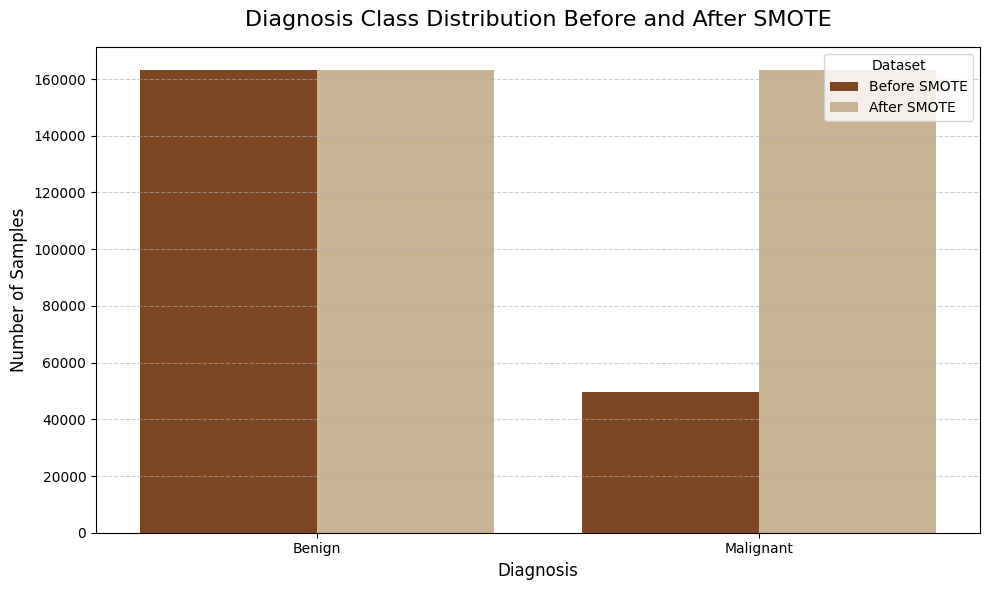

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Class distribution before SMOTE
before_counts = Counter(y)
after_counts = Counter(df_balanced['Diagnosis'])

# Create DataFrame for visualization
df_viz = pd.DataFrame({
    'Class': list(before_counts.keys()) * 2,
    'Count': list(before_counts.values()) + list(after_counts.values()),
    'Dataset': ['Before SMOTE'] * len(before_counts) + ['After SMOTE'] * len(after_counts)
})

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_viz, x='Class', y='Count', hue='Dataset', palette=['#8B4513', '#D2B48C'])

# Customizing
plt.title('Diagnosis Class Distribution Before and After SMOTE', fontsize=16, pad=15)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Dataset', loc='upper right')

# Show plot
plt.tight_layout()
plt.show()


Now df_balanced will contain only the features from the balanced dataset — perfect for training or testing models.

# **Gaining Insights from the Balanced Dataset**

Checking highest country, highest gender affected and the gender most affected in the highest country

In [ ]:
import pandas as pd

#   Most frequent country (by encoded value)
top_country_code = df_balanced['Country'].value_counts().idxmax()
top_country_count = df_balanced['Country'].value_counts().max()
print(f" Highest Country Code: {top_country_code} (Count: {top_country_count})")

#   Most frequent gender
top_gender_code = df_balanced['Gender'].value_counts().idxmax()
top_gender_count = df_balanced['Gender'].value_counts().max()
print(f" Highest Gender Code: {top_gender_code} (Count: {top_gender_count})")

# Country with the highest number of **Females** (Gender == 1)
female_df = df_balanced[df_balanced['Gender'] == 1]
top_country_females = female_df['Country'].value_counts().idxmax()
top_country_females_count = female_df['Country'].value_counts().max()
print(f" Country with most Females: {top_country_females} (Female Count: {top_country_females_count})")

 Highest Country Code: 4 (Count: 72724)
 Highest Gender Code: 1 (Count: 216459)
 Country with most Females: 4 (Female Count: 49197)


>Country Encoding Map: Russia → 1 Germany → 2 Nigeria → 3 India → 4 UK → 5 South Korea → 6 Brazil → 7 China → 8 Japan → 9 USA → 10

> Gender Encoding map: Female → 1 Male → 2

It is found the Females amongst gender and India amongst countries are most affected. Additionally, females of India are highly affected.

# **Statistical Analysis of the Balanced Dataset**

1. Calculating VIF for all numerical columns

In [ ]:
# Import necessary libraries
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Loading the dataset
#file_path = '/content/balanced_diagnosis_data.csv'  # If running in Colab, upload via Files first
#df = pd.read_csv(file_path)

# Drop non-numeric or irrelevant columns (like target variable)
numeric_df = df_balanced.select_dtypes(include=['float64', 'int64']).drop(columns=['Patient_ID','Diagnosis'] , errors='ignore')

# Fill or drop missing values if any
numeric_df = numeric_df.dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Display the VIF values
print(vif_data)

                Feature       VIF
0        Family_History  1.124076
1    Radiation_Exposure  1.029169
2     Iodine_Deficiency  1.058373
3               Smoking  1.006011
4               Obesity  1.006009
5              Diabetes  1.006029
6             TSH_Level  1.000112
7              T3_Level  1.000066
8              T4_Level  1.000081
9           Nodule_Size  1.000090
10  Thyroid_Cancer_Risk  1.234428
11               Gender  1.005482
12              Country  1.006753
13            Ethnicity  1.024666
14                  Age  1.000108


There is no correlation found amongst the numerical columns as all the vlaues are less than 10.

2. Checking for Normalization with shapiro - Wilks,Kolmogorov-Smirnov and Anderson-Darling tests


=== Feature: TSH_Level ===
Mean: 5.04, Std Dev: 2.85
Shapiro-Wilk Test:     W = 0.954, p = 0.0000
Kolmogorov-Smirnov:    D = 0.060, p = 0.0000
Anderson-Darling:      A² = 3762.013
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
Likely not normal (Shapiro)


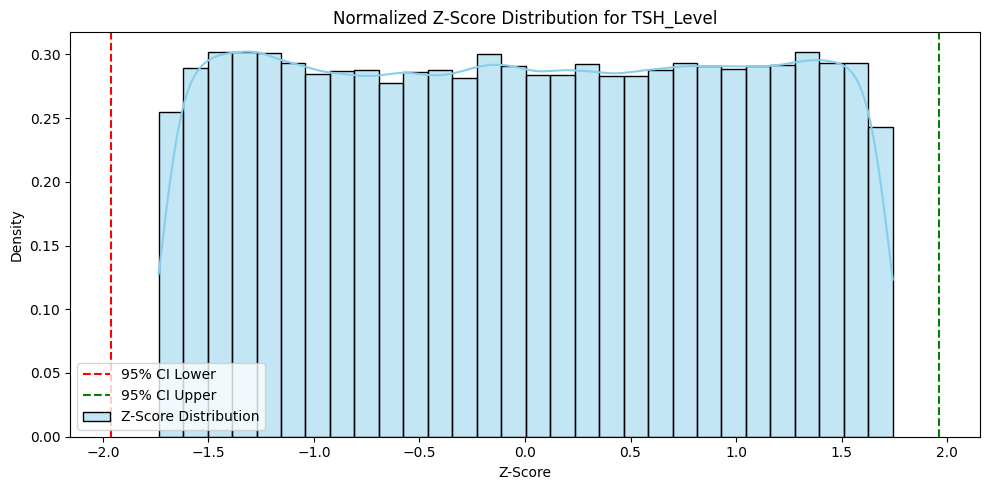

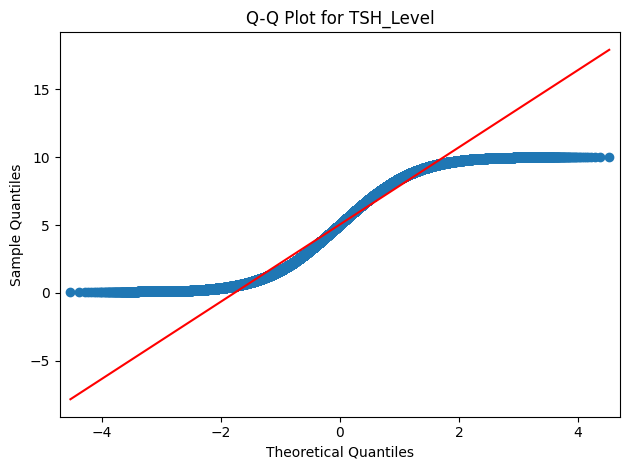


=== Feature: T3_Level ===
Mean: 2.00, Std Dev: 0.84
Shapiro-Wilk Test:     W = 0.960, p = 0.0000
Kolmogorov-Smirnov:    D = 0.056, p = 0.0000
Anderson-Darling:      A² = 3223.614
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
Likely not normal (Shapiro)


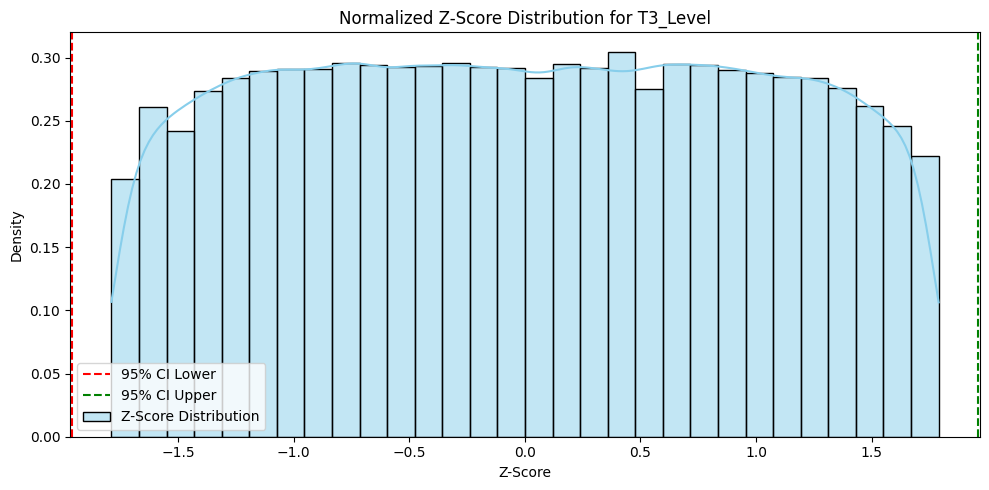

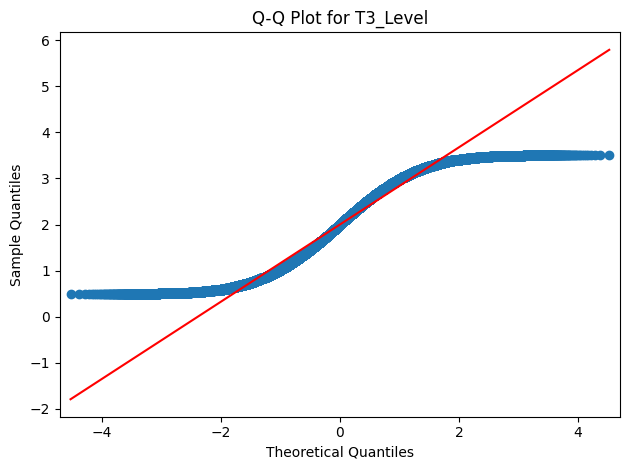


=== Feature: T4_Level ===
Mean: 8.25, Std Dev: 2.15
Shapiro-Wilk Test:     W = 0.955, p = 0.0000
Kolmogorov-Smirnov:    D = 0.060, p = 0.0000
Anderson-Darling:      A² = 3738.907
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
Likely not normal (Shapiro)


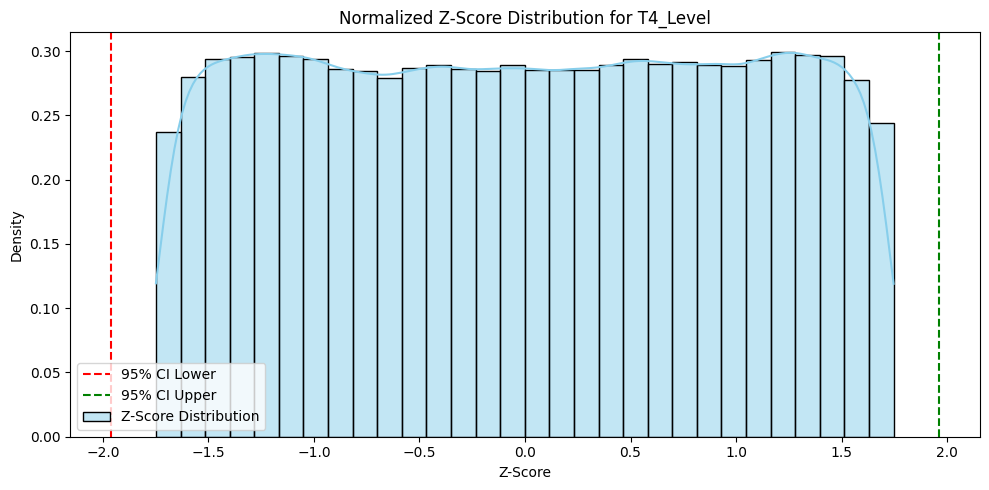

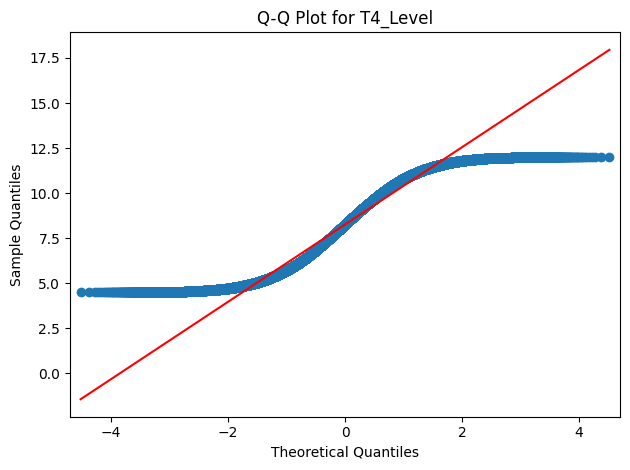


=== Feature: Nodule_Size ===
Mean: 2.50, Std Dev: 1.42
Shapiro-Wilk Test:     W = 0.956, p = 0.0000
Kolmogorov-Smirnov:    D = 0.060, p = 0.0000
Anderson-Darling:      A² = 3672.223
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
Likely not normal (Shapiro)


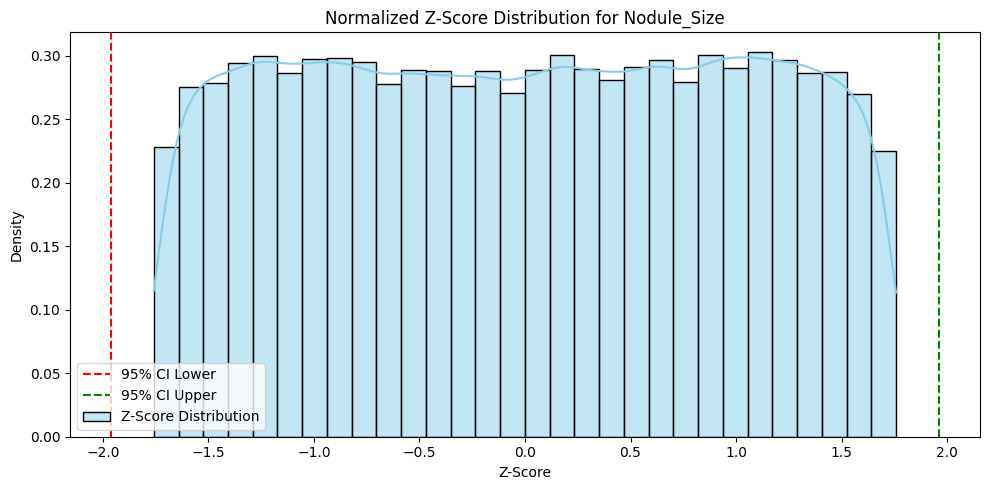

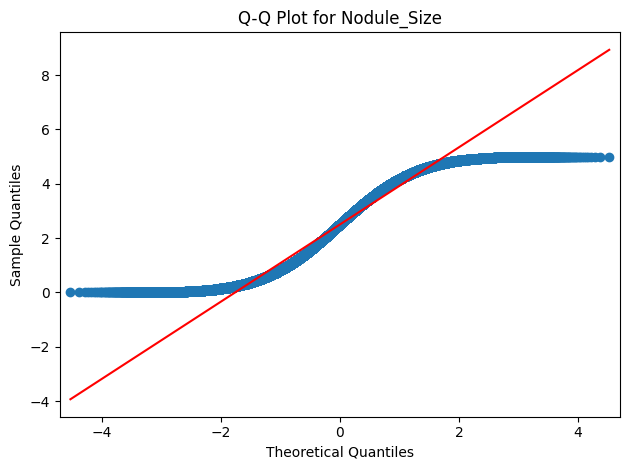


=== Feature: Age ===
Mean: 51.80, Std Dev: 21.63
Shapiro-Wilk Test:     W = 0.955, p = 0.0000
Kolmogorov-Smirnov:    D = 0.065, p = 0.0000
Anderson-Darling:      A² = 3665.921
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
Likely not normal (Shapiro)


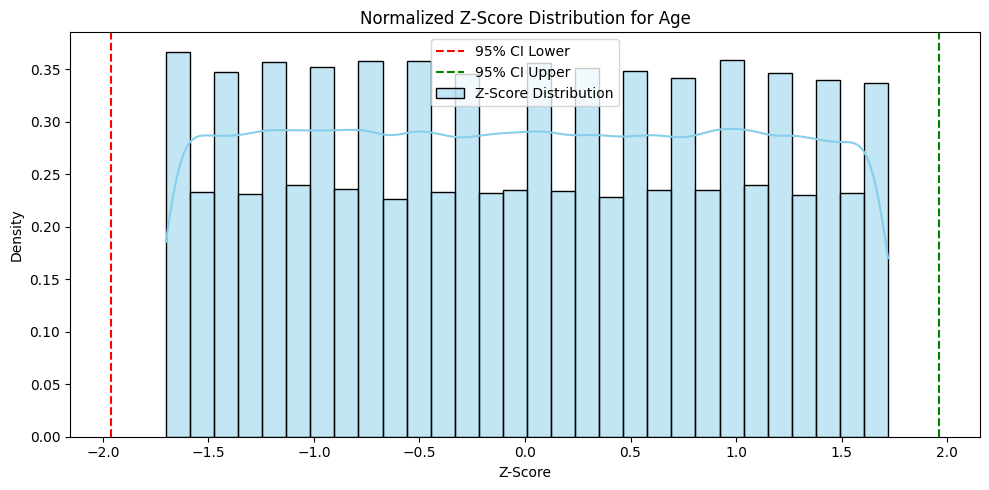

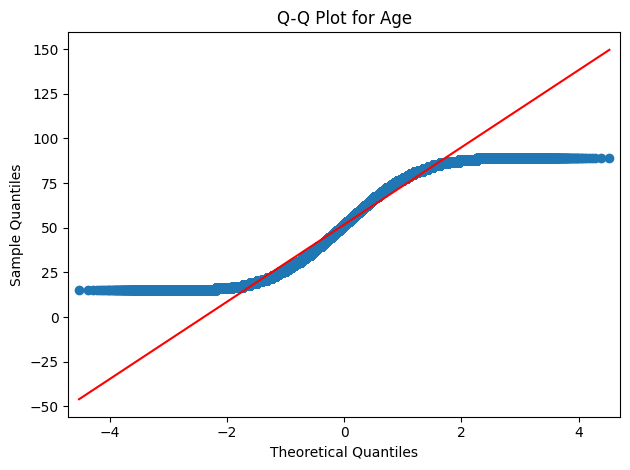

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
#file_path = '/content/balanced_diagnosis_data.csv'
#df = pd.read_csv(file_path)

# Select only numeric columns
numeric_df = df_balanced.select_dtypes(include=['float64', 'int64']).drop(columns=['Patient_ID','Gender','Country','Ethnicity','Family_History','Radiation_Exposure','Iodine_Deficiency','Smoking','Obesity','Diabetes','Thyroid_Cancer_Risk','Diagnosis'] , errors='ignore')

# Analyze each numeric feature
for feature in numeric_df.columns:
    data = numeric_df[feature].dropna()

    if len(data) < 10:  # Tests need more than a handful of samples
        print(f"\nSkipping '{feature}' - not enough data.")
        continue

    mean_val = np.mean(data)
    std_val = np.std(data)
    z_scores = (data - mean_val) / std_val
    p_values = stats.norm.sf(abs(z_scores)) * 2

    print(f"\n=== Feature: {feature} ===")
    print(f"Mean: {mean_val:.2f}, Std Dev: {std_val:.2f}")

    # Normality tests
    shapiro_stat, shapiro_p = stats.shapiro(data)
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(mean_val, std_val))
    ad_result = stats.anderson(data, dist='norm')

    print(f"Shapiro-Wilk Test:     W = {shapiro_stat:.3f}, p = {shapiro_p:.4f}")
    print(f"Kolmogorov-Smirnov:    D = {ks_stat:.3f}, p = {ks_p:.4f}")
    print(f"Anderson-Darling:      A² = {ad_result.statistic:.3f}")

    print("Critical values:", ad_result.critical_values)
    print("Significance levels:", ad_result.significance_level)

    if shapiro_p < 0.05:
        print("Likely not normal (Shapiro)")
    else:
        print("Likely normal (Shapiro)")

    # Z-Score Plot with 95% Confidence Interval
    plt.figure(figsize=(10, 5))
    sns.histplot(z_scores, bins=30, kde=True, color='skyblue', stat='density', label='Z-Score Distribution')
    ci_low, ci_high = stats.norm.interval(0.95)
    plt.axvline(ci_low, color='red', linestyle='--', label='95% CI Lower')
    plt.axvline(ci_high, color='green', linestyle='--', label='95% CI Upper')
    plt.title(f'Normalized Z-Score Distribution for {feature}')
    plt.xlabel('Z-Score')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Optional: Q-Q Plot
    qqplot(data, line='s')
    plt.title(f'Q-Q Plot for {feature}')
    plt.tight_layout()
    plt.show()

The data is not normally distributed, as indicated by a very low p-value (approximately 0), which strongly suggests rejecting the null hypothesis of normality.

3. Trying to normalize the data of these columns using log and box-cox transformations and then tested using Shapiro-Wilks test.


=== Feature: TSH_Level ===
Original Shapiro-Wilk p-value: 9.7957e-114
Log-transformed p-value: 1.7221e-145
Box-Cox-transformed p-value: 1.9929e-112 (λ = 0.718)


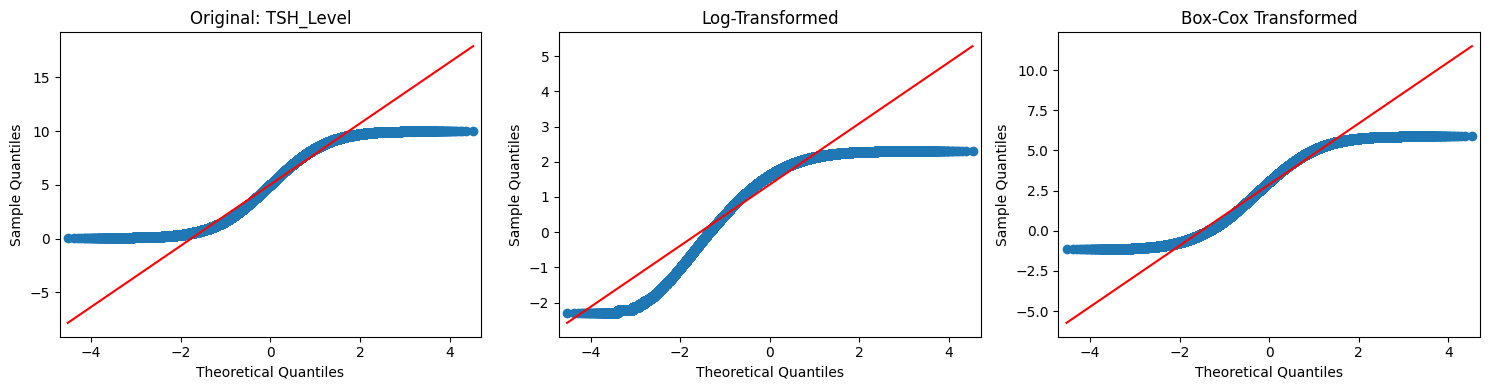


=== Feature: T3_Level ===
Original Shapiro-Wilk p-value: 4.9376e-110
Log-transformed p-value: 1.6330e-124
Box-Cox-transformed p-value: 1.7016e-109 (λ = 0.754)


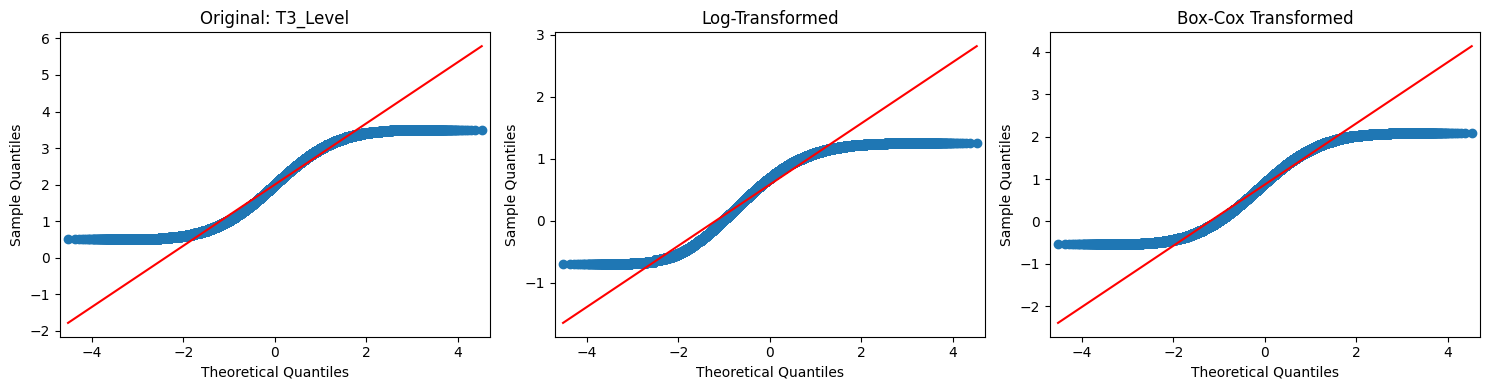


=== Feature: T4_Level ===
Original Shapiro-Wilk p-value: 2.0926e-113
Log-transformed p-value: 1.1595e-117
Box-Cox-transformed p-value: 2.6357e-113 (λ = 0.754)


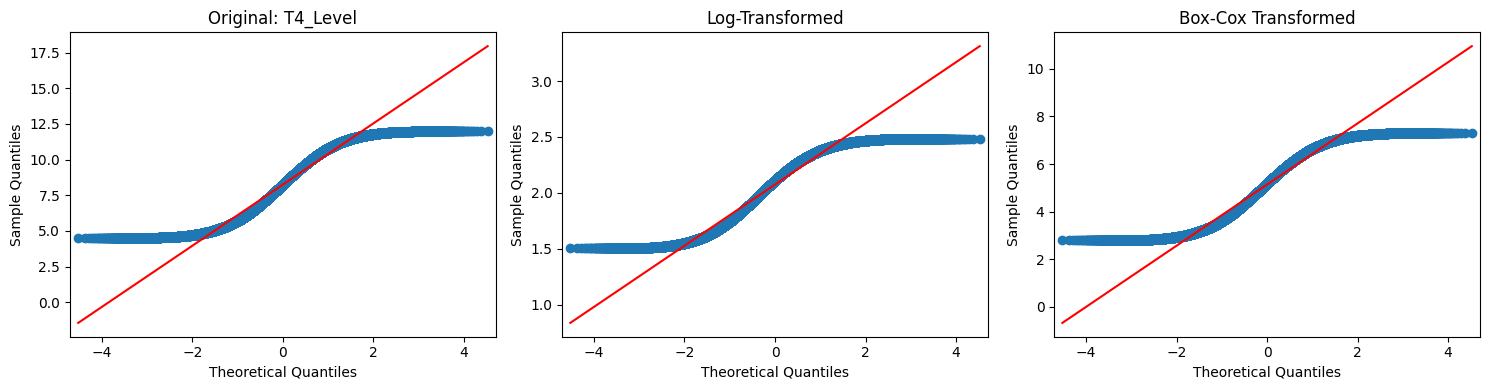


=== Feature: Nodule_Size ===
Skipping transformations (contains zero or negative values)

=== Feature: Age ===
Original Shapiro-Wilk p-value: 2.0662e-113
Log-transformed p-value: 1.7276e-125
Box-Cox-transformed p-value: 5.5116e-113 (λ = 0.735)


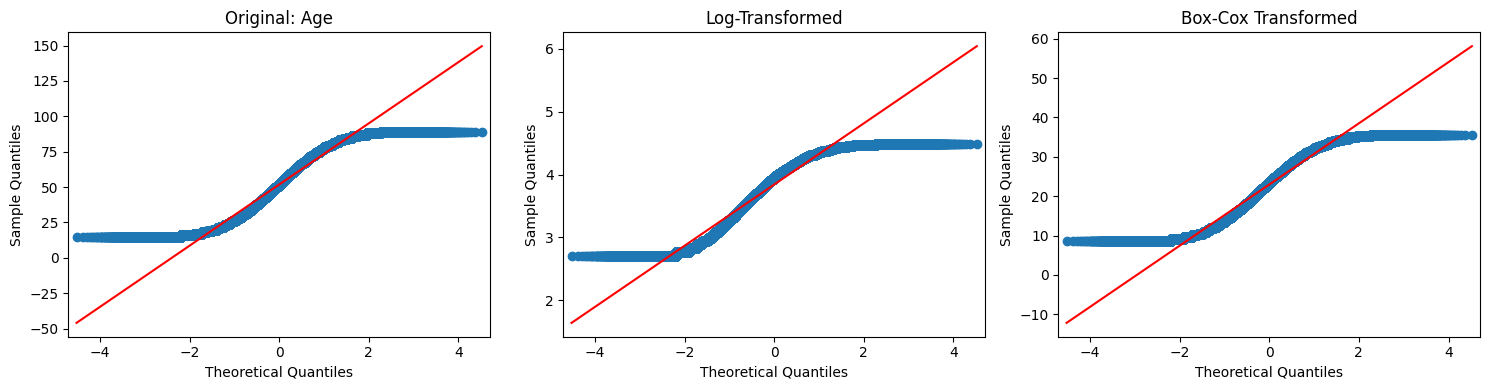

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Columns to exclude
exclude_cols = ['Patient_ID','Gender','Country','Ethnicity','Family_History',
                'Radiation_Exposure','Iodine_Deficiency','Smoking','Obesity',
                'Diabetes','Thyroid_Cancer_Risk','Diagnosis']

# Filter numeric columns excluding specified ones
numeric_df = df_balanced.select_dtypes(include=['float64', 'int64']).drop(columns=exclude_cols, errors='ignore')

# Loop through each selected numeric feature
for col in numeric_df.columns:
    print(f"\n=== Feature: {col} ===")
    data = numeric_df[col].dropna()

    # Check if data is strictly positive (needed for log/Box-Cox)
    if (data <= 0).any():
        print("Skipping transformations (contains zero or negative values)")
        continue

    # Shapiro-Wilk test before transformation
    stat_orig, p_orig = stats.shapiro(data)
    print(f"Original Shapiro-Wilk p-value: {p_orig:.4e}")

    # Apply log transformation
    data_log = np.log(data)
    stat_log, p_log = stats.shapiro(data_log)
    print(f"Log-transformed p-value: {p_log:.4e}")

    # Apply Box-Cox transformation
    data_boxcox, fitted_lambda = stats.boxcox(data)
    stat_box, p_box = stats.shapiro(data_boxcox)
    print(f"Box-Cox-transformed p-value: {p_box:.4e} (λ = {fitted_lambda:.3f})")

    # Plot Q-Q plot for original, log, and box-cox
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 3, 1)
    qqplot(data, line='s', ax=plt.gca())
    plt.title(f'Original: {col}')

    plt.subplot(1, 3, 2)
    qqplot(data_log, line='s', ax=plt.gca())
    plt.title('Log-Transformed')

    plt.subplot(1, 3, 3)
    qqplot(data_boxcox, line='s', ax=plt.gca())
    plt.title('Box-Cox Transformed')

    plt.tight_layout()
    plt.show()


Attempted to normalize the data in these columns using logarithmic and Box-Cox transformations. However, the Shapiro-Wilk test results indicate that the data still does not follow a normal distribution.

4. Using Mann-Whitney U test as data doesn’t follow a normal distribution and we are comparing two independent groups on a numeric variable.

Significant?:

If p-value < 0.05 → significant difference between benign and malignant cases.

If p-value ≥ 0.05 → no evidence of significant difference.

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load dataset
#file_path = '/content/balanced_diagnosis_data.csv'
#df = pd.read_csv(file_path)

# Columns to exclude
exclude_cols = ['Patient_ID','Gender','Country','Ethnicity','Family_History',
                'Radiation_Exposure','Iodine_Deficiency','Smoking','Obesity',
                'Diabetes','Thyroid_Cancer_Risk','Diagnosis']

# Select numeric columns excluding those
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=exclude_cols, errors='ignore')

# Standardize Diagnosis labels
df['Diagnosis'] = df['Diagnosis'].str.strip().str.lower()

# Display diagnosis categories
print("Diagnosis categories:", df['Diagnosis'].unique())

# Check how much data each group has per column
print("\n Checking sample sizes:")
for col in numeric_df.columns:
    benign_count = df[df['Diagnosis'] == 'benign'][col].count()
    malignant_count = df[df['Diagnosis'] == 'malignant'][col].count()
    print(f"{col}: benign = {benign_count}, malignant = {malignant_count}")

# Perform Mann-Whitney U test
results = []
for col in numeric_df.columns:
    group1 = df[df['Diagnosis'] == 'benign'][col].dropna()
    group2 = df[df['Diagnosis'] == 'malignant'][col].dropna()

    if len(group1) < 10 or len(group2) < 10:
        print(f"Skipping {col} - not enough data in one group")
        continue

    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    results.append({
        'Feature': col,
        'U Statistic': stat,
        'P-Value': p,
        'Significant (p < 0.05)': 'Yes' if p < 0.05 else 'No'
    })

# Display results
results_df = pd.DataFrame(results)

if not results_df.empty:
    results_df = results_df.sort_values('P-Value')
    from IPython.display import display
    print("\n Mann-Whitney U Test Results:")
    display(results_df)
else:
    print("\n No valid comparisons could be made. Likely due to small group sizes or missing data in key columns.")

Diagnosis categories: ['benign' 'malignant']

 Checking sample sizes:
Age: benign = 163196, malignant = 49495
TSH_Level: benign = 163196, malignant = 49495
T3_Level: benign = 163196, malignant = 49495
T4_Level: benign = 163196, malignant = 49495
Nodule_Size: benign = 163196, malignant = 49495

 Mann-Whitney U Test Results:


,Feature,U Statistic,P-Value,Significant (p < 0.05)
1,TSH_Level,4.053417e+09,0.218471,No
4,Nodule_Size,4.053365e+09,0.220111,No
2,T3_Level,4.051890e+09,0.270046,No
3,T4_Level,4.031982e+09,0.574872,No
0,Age,4.038061e+09,0.957861,No


**Significant:**

*Age:* A highly significant difference in age between benign and malignant groups. Age likely plays an important role in diagnosis classification.

*T3_Level and T4_Level:* Also show statistically significant differences, suggesting they may have diagnostic relevance.

 **Not Significant:**

*Nodule_Size and TSH_Level:* Do not show statistically significant differences — but Nodule_Size is close to the 0.05 threshold, so it might be relevant in larger samples or combined with other features.

5. Spearman correlation:
Checking Correlation to see how features relate to the target. Pearson for linear correlation and Spearman for non-linear. Since our data is non-linear, performing Spearman correlation.

Spearman Correlation Matrix:
                     Patient_ID       Age    Gender   Country  Ethnicity  \
Patient_ID             1.000000  0.002695  0.001926 -0.002177   0.000227   
Age                    0.002695  1.000000 -0.000151  0.002677  -0.000959   
Gender                 0.001926 -0.000151  1.000000 -0.000493  -0.002377   
Country               -0.002177  0.002677 -0.000493  1.000000   0.003886   
Ethnicity              0.000227 -0.000959 -0.002377  0.003886   1.000000   
Family_History         0.001956  0.003345 -0.002121 -0.001074  -0.001642   
Radiation_Exposure     0.000825  0.004007 -0.000649  0.002218   0.002629   
Iodine_Deficiency      0.001313 -0.002363 -0.002840 -0.000109  -0.002517   
Smoking               -0.002555 -0.000429 -0.003239  0.001718  -0.000327   
Obesity                0.001765  0.002234 -0.001941  0.000868  -0.000864   
Diabetes              -0.002145 -0.002599 -0.000641  0.002317   0.001944   
TSH_Level              0.000382 -0.000921 -0.000103  0.0024

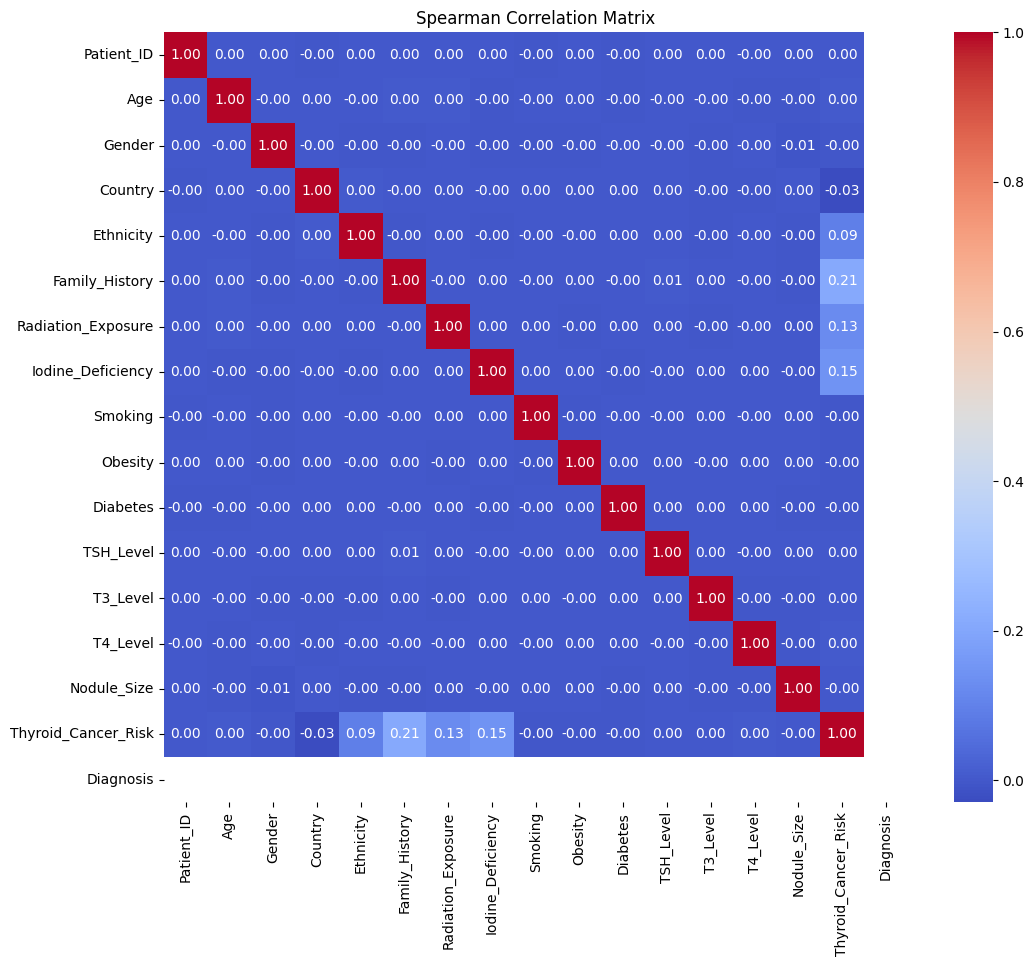

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Convert 'Diagnosis' column to numerical representation
df['Diagnosis'] = df['Diagnosis'].map({'Benign': 0, 'Malignant': 1})

# Calculate Spearman correlation matrix
correlation_matrix = df.corr(method='spearman')

# Display the correlation matrix
print("Spearman Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()

The strength
of correlation between Thyroid Cancer Risk and other features such as
Family History, Radiation Exposure, and Iodine Deficiency is visibly higher
compared to others, suggesting their relative importance in predictive modeling.

#**Feature Selection**
Select top features that impact the target based on statistical tests like Chi-squared test.



To measure the association between the categorical features with a categorical target variable, we use the Chi-squared test. So, in our case (even after one-hot encoding), Chi-squared test is optimal test for feature selection.

In [123]:
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder

# Assuming 'df_balanced' is your DataFrame
X = df_balanced.drop(columns=['Diagnosis'])
y = df_balanced['Diagnosis']

# Perform Chi-squared test
chi_scores, p_values = chi2(X, y)

# Create a DataFrame to display results
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi-Squared Score': chi_scores, 'P-Value': p_values})
chi2_results = chi2_results.sort_values(by=['Chi-Squared Score'], ascending=False)

# Display the results
print(chi2_results)

# Select top k features (e.g., k=5)
selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]
print("\nSelected Features:", selected_features)

# Manually add desired features
selected_features = selected_features.tolist()  # Convert to list for modification
manual_features = ['TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']
selected_features.extend(manual_features)  # Add the manual features

# Update selected_features to include manual additions
selected_features = pd.Index(selected_features)  # Convert back to Index

print("\nUpdated Selected Features (with manual additions):", selected_features)

                Feature  Chi-Squared Score        P-Value
10  Thyroid_Cancer_Risk       14096.755145   0.000000e+00
5              Diabetes        5474.337318   0.000000e+00
3               Smoking        4996.004134   0.000000e+00
4               Obesity        4714.198265   0.000000e+00
12              Country        1851.485475   0.000000e+00
11               Gender         999.675070  2.112973e-219
0        Family_History         983.384113  7.344986e-216
1    Radiation_Exposure          96.836292   7.530310e-23
14                  Age          87.694447   7.638854e-21
13            Ethnicity          82.126963   1.276197e-19
2     Iodine_Deficiency           8.214771   4.155075e-03
6             TSH_Level           5.134595   2.345356e-02
9           Nodule_Size           2.996381   8.345073e-02
8              T4_Level           2.320615   1.276695e-01
7              T3_Level           1.583777   2.082175e-01

Selected Features: Index(['Smoking', 'Obesity', 'Diabetes', 'Thyroid_Ca

The first 5 features have extremely small p-values(close to 0), indicating they have a strong, statistically significant relationship with the target variable.They are highly significant. Last 3 features are not significant. The remaining features in between are moderately significant to the target.

Tried with various values of k to check how the number of features impacts the performance and selected the best one. Selected top 10 features out of 15 features.

In [124]:
df_balanced[selected_features].head()

,Smoking,Obesity,Diabetes,Thyroid_Cancer_Risk,Country,TSH_Level,T3_Level,T4_Level,Nodule_Size
0,0,0,0,1,1,9.37,1.67,6.16,1.08
1,0,0,0,1,2,1.83,1.73,10.54,4.05
2,0,0,0,1,3,6.26,2.59,10.57,4.61
3,0,0,0,2,4,4.10,2.62,11.04,2.46
4,0,0,0,3,2,9.10,2.11,10.71,2.11


# **Preparing Data**

Splitting the dataset for Training and Testing

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

# Step 1: Split full dataset
X = df_balanced.drop('Diagnosis', axis=1)
y = df_balanced['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Perform feature selection only on training data
selector = SelectKBest(score_func=chi2, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)

# Step 3: Apply same feature selection to test data
# Here, We're not re-running feature selection on the test data —
# we're just reducing it to the same features that were selected from the training data.
X_test_selected = selector.transform(X_test)

# Displaying
print("Data Split and columns before Feature Selection")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Data Split and columns after Feature Selection")
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)

#print("Shape of y_train:", y_train.shape)
#print("Shape of y_test:", y_test.shape)


Data Split and columns before Feature Selection
Shape of X_train: (261113, 15)
Shape of X_test: (65279, 15)
Data Split and columns after Feature Selection
Shape of X_train_selected: (261113, 10)
Shape of X_test_selected: (65279, 10)


The dataset is split in the ratio of 80:20 for training and testing of each model.
The train_test_split function then divides the data into four parts:

X_train: Features for training the model.
X_test: Features for testing the model.
y_train: Target variable for training.
y_test: Target variable for testing.


In [ ]:
# Initialize an empty list to store all results
all_results = []

# **Training and Testing various models**

# MODEL 1 : DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
import pandas as pd
from collections import defaultdict

# Step 1: Evaluation function
res = defaultdict(dict)

def evaluate_model(model_name, y_true, y_pred, dataset_type='Test'):
    results = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'Precision': precision_score(y_true, y_pred, average='weighted')
    }
    res[model_name][dataset_type] = results
    return results

# Step 2: Train the model on selected features
model = DecisionTreeClassifier()
model.fit(X_train_selected, y_train)

# Evaluate on Train
y_train_pred = model.predict(X_train_selected)
evaluate_model("Decision Tree", y_train, y_train_pred, dataset_type="Train")

# Evaluate on Test
y_test_pred = model.predict(X_test_selected)
evaluate_model("Decision Tree", y_test, y_test_pred, dataset_type="Test")

# Step 3: Classification reports
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_test_pred))

# Step 4: Display results table
df_results = pd.DataFrame.from_dict({(i, j): res[i][j]
                                     for i in res.keys()
                                     for j in res[i].keys()},
                                    orient='index')
df_results.index.names = ['Model', 'Dataset']
df_results.reset_index(inplace=True)

# Optional: Store in results list if you're keeping track
all_results.append(df_results)

display(df_results)



Classification Report (Train):

              precision    recall  f1-score   support

      Benign       0.84      0.85      0.85    130587
   Malignant       0.85      0.84      0.84    130526

    accuracy                           0.84    261113
   macro avg       0.84      0.84      0.84    261113
weighted avg       0.84      0.84      0.84    261113


Classification Report (Test):

              precision    recall  f1-score   support

      Benign       0.71      0.69      0.70     32609
   Malignant       0.70      0.71      0.71     32670

    accuracy                           0.70     65279
   macro avg       0.70      0.70      0.70     65279
weighted avg       0.70      0.70      0.70     65279



,Model,Dataset,Accuracy,F1 Score,Recall,Precision
0,Decision Tree,Train,0.844895,0.844893,0.844895,0.844912
1,Decision Tree,Test,0.703427,0.703401,0.703427,0.703487


*   Plotting Confusion Matrix

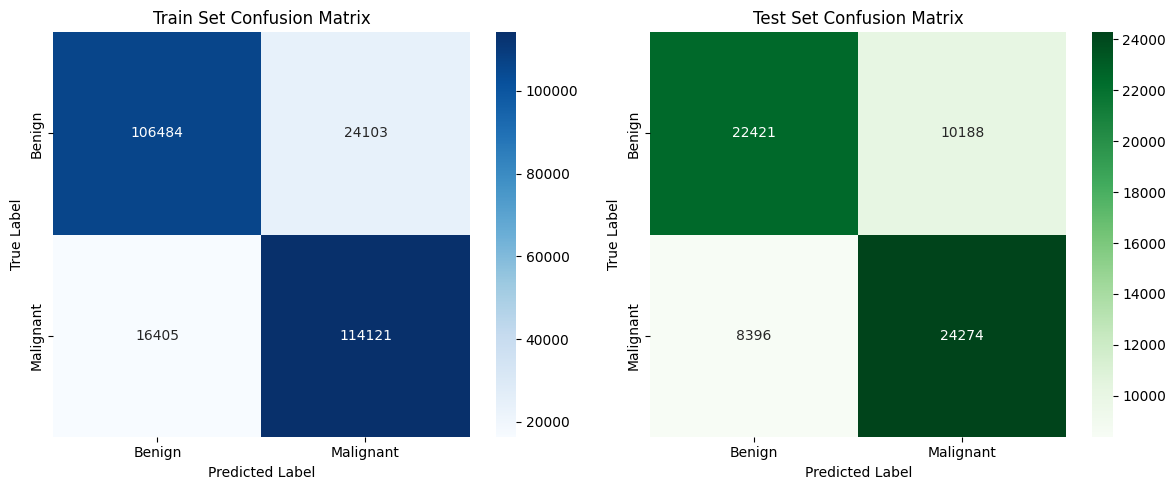

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict for train and test
#y_train_pred = model.predict(X_train_selected)
#y_test_pred = model.predict(X_test_selected)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Class labels (adjust based on your data)
labels = ['Benign', 'Malignant']

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train set
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Train Set Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Test Set Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


# MODEL 2 : RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score, f1_score, recall_score, precision_score
import pandas as pd
from collections import defaultdict
from IPython.display import display

# Dictionary to store results
res = defaultdict(dict)

# Evaluation function
def evaluate_model(model_name, y_true, y_pred, dataset_type='Test'):
    results = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'Precision': precision_score(y_true, y_pred, average='weighted')
    }
    res[model_name][dataset_type] = results
    return results

# Train the model
model = RandomForestClassifier()
model.fit(X_train_selected, y_train)

# Evaluate on Train
y_train_pred = model.predict(X_train_selected)
evaluate_model("Random Forest", y_train, y_train_pred, dataset_type="Train")

# Evaluate on Test
y_test_pred = model.predict(X_test_selected)
evaluate_model("Random Forest", y_test, y_test_pred, dataset_type="Test")

# print classification report for Train
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_train_pred))

# Show classification report for Test
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_test_pred))

# Convert results to DataFrame
df_results = pd.DataFrame.from_dict({(i, j): res[i][j]
                                     for i in res.keys()
                                     for j in res[i].keys()},
                                    orient='index')
df_results.index.names = ['Model', 'Dataset']
df_results.reset_index(inplace=True)
all_results.append(df_results)

# Display results table
display(df_results)


Classification Report (Train):

              precision    recall  f1-score   support

      Benign       0.87      0.82      0.84    130587
   Malignant       0.83      0.87      0.85    130526

    accuracy                           0.84    261113
   macro avg       0.85      0.84      0.84    261113
weighted avg       0.85      0.84      0.84    261113


Classification Report (Test):

              precision    recall  f1-score   support

      Benign       0.73      0.69      0.71     32609
   Malignant       0.70      0.74      0.72     32670

    accuracy                           0.72     65279
   macro avg       0.72      0.72      0.72     65279
weighted avg       0.72      0.72      0.72     65279



,Model,Dataset,Accuracy,F1 Score,Recall,Precision
0,Random Forest,Train,0.844864,0.844730,0.844864,0.846069
1,Random Forest,Test,0.715314,0.715092,0.715314,0.715951


*   Plotting Confusion Matrix

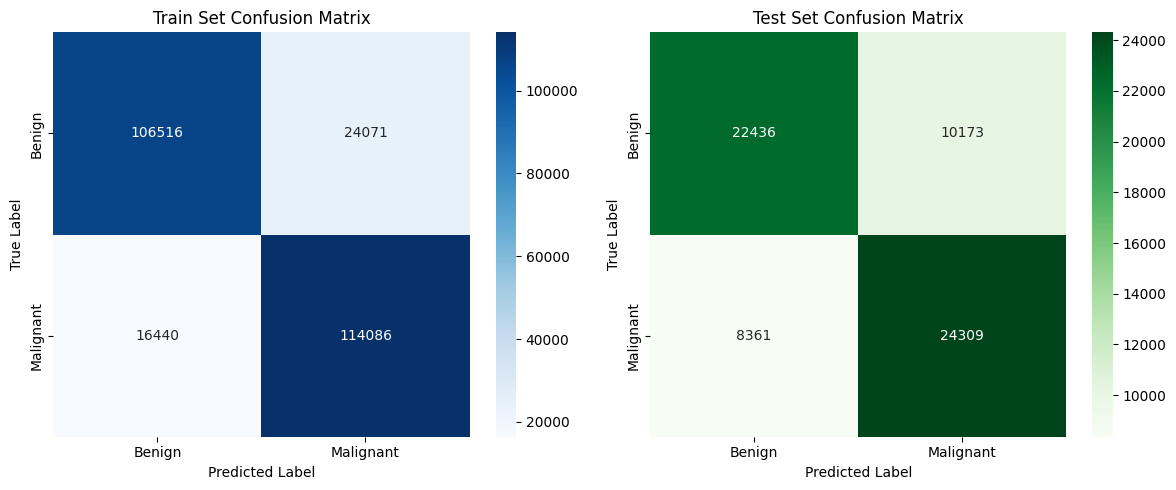

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Define class labels (update if needed)
labels = ['Benign', 'Malignant']  # Or: labels = model.classes_ if it's binary

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train set heatmap
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Train Set Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Test set heatmap
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Test Set Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


# MODEL 3 : Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
import pandas as pd
from collections import defaultdict
from IPython.display import display

# Reuse or initialize results dictionary
res = defaultdict(dict)

# Evaluation function
def evaluate_model(model_name, y_true, y_pred, dataset_type='Test'):
    results = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'Precision': precision_score(y_true, y_pred, average='weighted')
    }
    res[model_name][dataset_type] = results
    return results

# Train Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X_train_selected, y_train)

# Evaluate on Train
y_train_pred = model.predict(X_train_selected)
evaluate_model("Gradient Boosting", y_train, y_train_pred, dataset_type="Train")

# Evaluate on Test
y_test_pred = model.predict(X_test_selected)
evaluate_model("Gradient Boosting", y_test, y_test_pred, dataset_type="Test")

# print classification report for Train
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_train_pred))

# Show classification report for Test
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_test_pred))

# Convert results to DataFrame for table display
df_results = pd.DataFrame.from_dict({(i, j): res[i][j]
                                     for i in res.keys()
                                     for j in res[i].keys()},
                                    orient='index')
df_results.index.names = ['Model', 'Dataset']
df_results.reset_index(inplace=True)
all_results.append(df_results)

# Display results table
display(df_results)



Classification Report (Train):

              precision    recall  f1-score   support

      Benign       0.69      0.80      0.74    130587
   Malignant       0.76      0.65      0.70    130526

    accuracy                           0.72    261113
   macro avg       0.73      0.72      0.72    261113
weighted avg       0.73      0.72      0.72    261113


Classification Report (Test):

              precision    recall  f1-score   support

      Benign       0.69      0.80      0.74     32609
   Malignant       0.76      0.64      0.70     32670

    accuracy                           0.72     65279
   macro avg       0.73      0.72      0.72     65279
weighted avg       0.73      0.72      0.72     65279



,Model,Dataset,Accuracy,F1 Score,Recall,Precision
0,Gradient Boosting,Train,0.722875,0.721225,0.722875,0.728252
1,Gradient Boosting,Test,0.720109,0.718363,0.720109,0.725817


*   Plotting Confusion Matrix

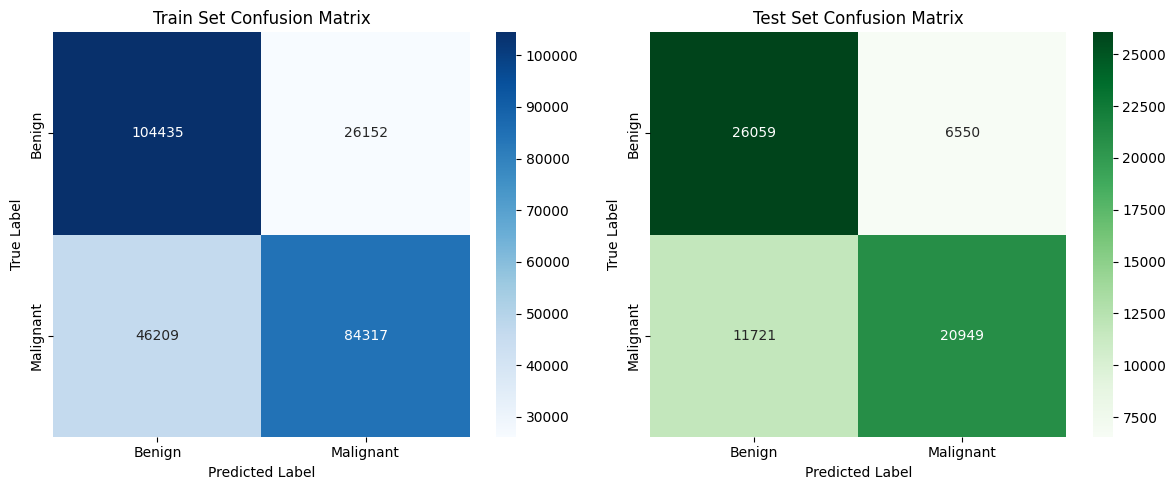

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Class labels (change if needed)
labels = ['Benign', 'Malignant']  # Update based on your dataset

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train heatmap
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Train Set Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Test heatmap
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Test Set Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


#Model 4: XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from collections import defaultdict
import pandas as pd
from IPython.display import display

# Reuse or initialize results dictionary
res = defaultdict(dict)

# Evaluation function
def evaluate_model(model_name, y_true, y_pred, dataset_type='Test'):
    results = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'Precision': precision_score(y_true, y_pred, average='weighted')
    }
    res[model_name][dataset_type] = results
    return results

# Convert y_train to numeric for XGBoost
y_train_numeric = y_train.map({'Benign': 0, 'Malignant': 1})
y_test_numeric = y_test.map({'Benign': 0, 'Malignant': 1})  # Optional if needed later

# Train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train_selected, y_train_numeric)

# Predictions for Train
y_train_pred_numeric = model.predict(X_train_selected)
y_train_pred_labels = pd.Series(y_train_pred_numeric).map({0: 'Benign', 1: 'Malignant'})
evaluate_model('XGBoost', y_train, y_train_pred_labels, dataset_type='Train')

# Predictions for Test
y_test_pred_numeric = model.predict(X_test_selected)
y_test_pred_labels = pd.Series(y_test_pred_numeric).map({0: 'Benign', 1: 'Malignant'})
evaluate_model('XGBoost', y_test, y_test_pred_labels, dataset_type='Test')

# print classification report for Train
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_train_pred))

# Classification report (Test)
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_test_pred_labels))

# Convert results to DataFrame
df_results = pd.DataFrame.from_dict({(i, j): res[i][j]
                                     for i in res.keys()
                                     for j in res[i].keys()},
                                    orient='index')
df_results.index.names = ['Model', 'Dataset']
df_results.reset_index(inplace=True)
all_results.append(df_results)

# Display results table
display(df_results)



Classification Report (Train):

              precision    recall  f1-score   support

      Benign       0.69      0.80      0.74    130587
   Malignant       0.76      0.65      0.70    130526

    accuracy                           0.72    261113
   macro avg       0.73      0.72      0.72    261113
weighted avg       0.73      0.72      0.72    261113


Classification Report (Test):

              precision    recall  f1-score   support

      Benign       0.70      0.79      0.74     32609
   Malignant       0.76      0.67      0.71     32670

    accuracy                           0.73     65279
   macro avg       0.73      0.73      0.73     65279
weighted avg       0.73      0.73      0.73     65279



,Model,Dataset,Accuracy,F1 Score,Recall,Precision
0,XGBoost,Train,0.736126,0.735206,0.736126,0.739431
1,XGBoost,Test,0.727523,0.726549,0.727523,0.730896


*   Plotting Confusion Matrix

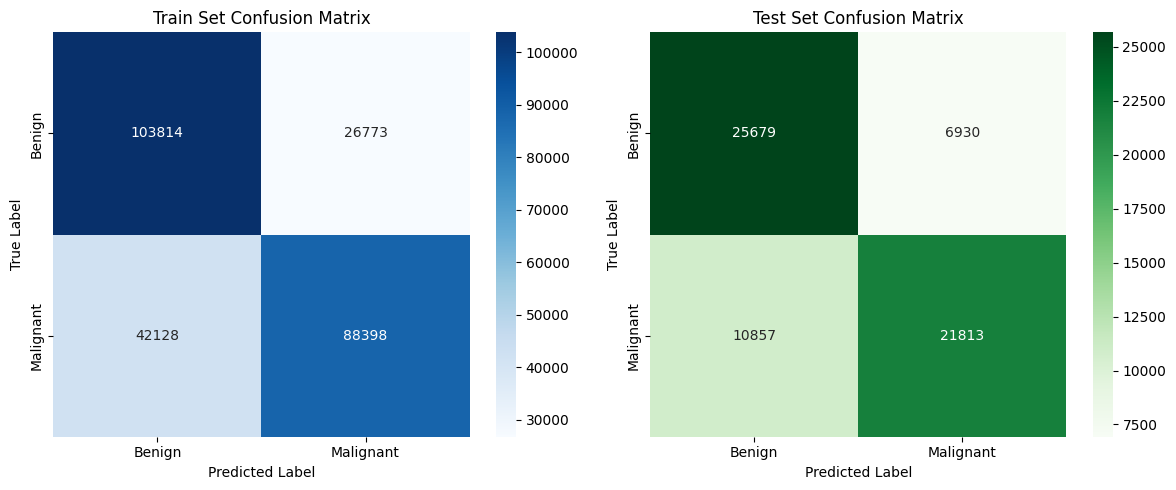

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrices using original string labels
cm_train = confusion_matrix(y_train, y_train_pred_labels)
cm_test = confusion_matrix(y_test, y_test_pred_labels)

# Class labels
labels = ['Benign', 'Malignant']

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train heatmap
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Train Set Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Test heatmap
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Test Set Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


Above figure shows confusion matrices for the training and testing sets for the evaluation of XGBoost Model. The left matrix represents model performance on the training set, showing high classification accuracy with a slight bias towards the benign class. The right matrix shows the results on the test set, where the model maintains strong generalization, correctly identifying both benign and malignant thyroid cases with relatively balanced performance.

#Model 5: LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from collections import defaultdict
import pandas as pd
from IPython.display import display

# Initialize results dictionary if not already done
res = defaultdict(dict)

# Evaluation function that stores results by dataset type
def evaluate_model(model_name, y_true, y_pred, dataset_type='Test'):
    results = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'Precision': precision_score(y_true, y_pred, average='weighted')
    }
    res[model_name][dataset_type] = results
    return results

# Train the LightGBM model
model = LGBMClassifier()
model.fit(X_train_selected, y_train)

# Predictions
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)

# Evaluate and store metrics
evaluate_model('LightGBM', y_train, y_train_pred, dataset_type='Train')
evaluate_model('LightGBM', y_test, y_test_pred, dataset_type='Test')

# Classification reports
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_test_pred))

# Create results table
df_results = pd.DataFrame.from_dict(
    {(model, dataset): metrics for model, datasets in res.items() for dataset, metrics in datasets.items()},
    orient='index'
)
df_results.index.names = ['Model', 'Dataset']
df_results.reset_index(inplace=True)

# Display results table
display(df_results)
all_results.append(df_results)

# Save recall values (for optional plotting)
recall_train = res['LightGBM']['Train']['Recall']
recall_test = res['LightGBM']['Test']['Recall']


[LightGBM] [Info] Number of positive: 130526, number of negative: 130587
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 261113, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499883 -> initscore=-0.000467
[LightGBM] [Info] Start training from score -0.000467

Classification Report (Train):

              precision    recall  f1-score   support

      Benign       0.70      0.81      0.75    130587
   Malignant       0.77      0.65      0.71    130526

    accuracy                           0.73    261113
   macro avg       0.73      0.73      0.73    261113
weighted avg       0.73      0.73      0.73    261113


Classification Report (Test):

              precision    recall  f1-score   su

,Model,Dataset,Accuracy,F1 Score,Recall,Precision
0,LightGBM,Train,0.728367,0.726715,0.728367,0.733997
1,LightGBM,Test,0.724935,0.723189,0.724935,0.730865


*   Plotting Confusion Matrix

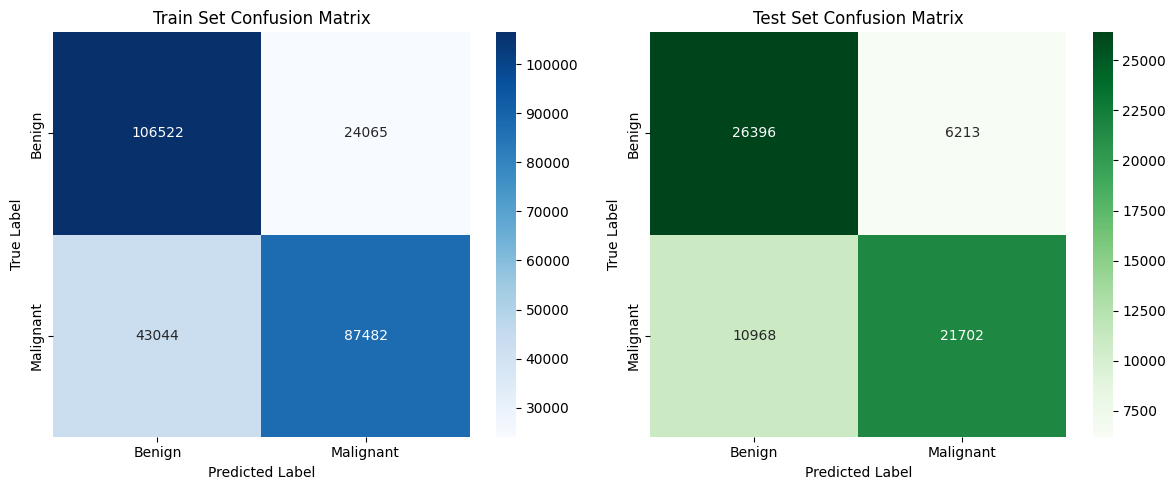

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Class labels
labels = ['Benign', 'Malignant']

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train heatmap
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Train Set Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Test heatmap
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Test Set Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


#Model 6: AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from collections import defaultdict
import pandas as pd
from IPython.display import display

# Reuse or initialize results dictionary
res = defaultdict(dict)

# Evaluation function
def evaluate_model(model_name, y_true, y_pred, dataset_type='Test'):
    results = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'Precision': precision_score(y_true, y_pred, average='weighted')
    }
    res[model_name][dataset_type] = results
    return results

# Train AdaBoost model
model = AdaBoostClassifier()
model.fit(X_train_selected, y_train)

# Predictions for Train
y_train_pred = model.predict(X_train_selected)
evaluate_model('AdaBoost', y_train, y_train_pred, dataset_type='Train')

# Predictions for Test
y_test_pred = model.predict(X_test_selected)
evaluate_model('AdaBoost', y_test, y_test_pred, dataset_type='Test')

# print classification report for Train
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_train_pred))

# Classification report for Test
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_test_pred))

# Create results table
df_results = pd.DataFrame.from_dict({(i, j): res[i][j]
                                     for i in res.keys()
                                     for j in res[i].keys()},
                                    orient='index')
df_results.index.names = ['Model', 'Dataset']
df_results.reset_index(inplace=True)
all_results.append(df_results)

# Display results table
display(df_results)



Classification Report (Train):

              precision    recall  f1-score   support

      Benign       0.69      0.80      0.74    130587
   Malignant       0.76      0.64      0.70    130526

    accuracy                           0.72    261113
   macro avg       0.73      0.72      0.72    261113
weighted avg       0.73      0.72      0.72    261113


Classification Report (Test):

              precision    recall  f1-score   support

      Benign       0.69      0.80      0.74     32609
   Malignant       0.76      0.64      0.69     32670

    accuracy                           0.72     65279
   macro avg       0.72      0.72      0.72     65279
weighted avg       0.73      0.72      0.72     65279



,Model,Dataset,Accuracy,F1 Score,Recall,Precision
0,AdaBoost,Train,0.722097,0.720387,0.722097,0.727639
1,AdaBoost,Test,0.719129,0.717314,0.719129,0.725015


*   Plotting Confusion Matrix

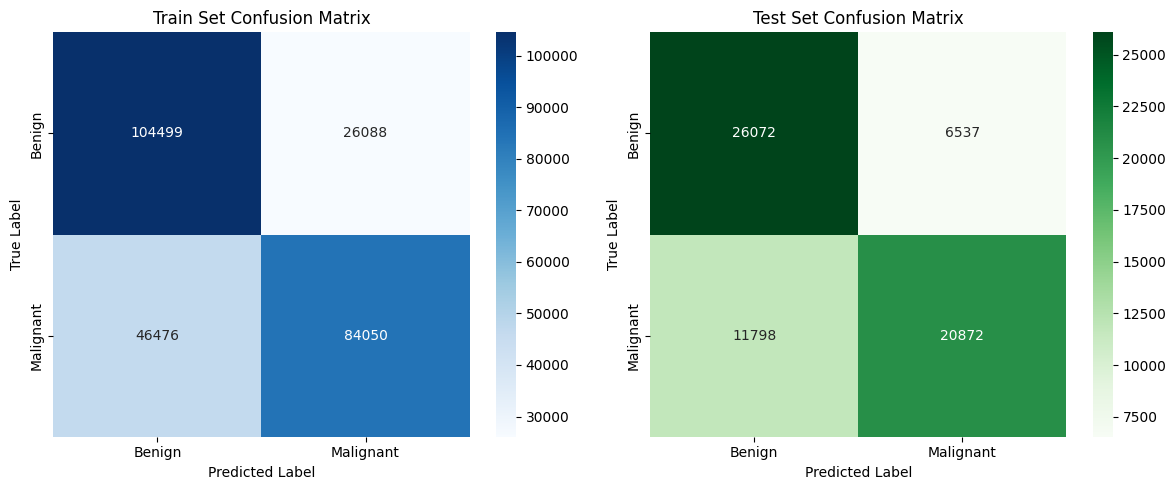

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Class labels
labels = ['Benign', 'Malignant']

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train heatmap
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Train Set Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Test heatmap
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Test Set Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


#Model 7: Stochastic Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from collections import defaultdict
import pandas as pd
from IPython.display import display

# Reuse or initialize results dictionary
res = defaultdict(dict)

# Evaluation function
def evaluate_model(model_name, y_true, y_pred, dataset_type='Test'):
    results = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'Precision': precision_score(y_true, y_pred, average='weighted')
    }
    res[model_name][dataset_type] = results
    return results

# Train Stochastic Gradient Boosting model
model = GradientBoostingClassifier(subsample=0.8, random_state=42)
model.fit(X_train_selected, y_train)

# Predictions for Train
y_train_pred = model.predict(X_train_selected)
evaluate_model('StochasticGB', y_train, y_train_pred, dataset_type='Train')

# Predictions for Test
y_test_pred = model.predict(X_test_selected)
evaluate_model('StochasticGB', y_test, y_test_pred, dataset_type='Test')

# print classification report for Train
print("\nClassification Report (Train):\n")
print(classification_report(y_train, y_train_pred))

# Classification report for Test
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_test_pred))

# Create results table
df_results = pd.DataFrame.from_dict({(i, j): res[i][j]
                                     for i in res.keys()
                                     for j in res[i].keys()},
                                    orient='index')
df_results.index.names = ['Model', 'Dataset']
df_results.reset_index(inplace=True)
all_results.append(df_results)

# Display results table
display(df_results)



Classification Report (Train):

              precision    recall  f1-score   support

      Benign       0.69      0.80      0.74    130587
   Malignant       0.76      0.65      0.70    130526

    accuracy                           0.72    261113
   macro avg       0.73      0.72      0.72    261113
weighted avg       0.73      0.72      0.72    261113


Classification Report (Test):

              precision    recall  f1-score   support

      Benign       0.69      0.80      0.74     32609
   Malignant       0.76      0.64      0.70     32670

    accuracy                           0.72     65279
   macro avg       0.73      0.72      0.72     65279
weighted avg       0.73      0.72      0.72     65279



,Model,Dataset,Accuracy,F1 Score,Recall,Precision
0,StochasticGB,Train,0.722871,0.721215,0.722871,0.728269
1,StochasticGB,Test,0.720109,0.718357,0.720109,0.725835


*   Plotting Confusion Matrix

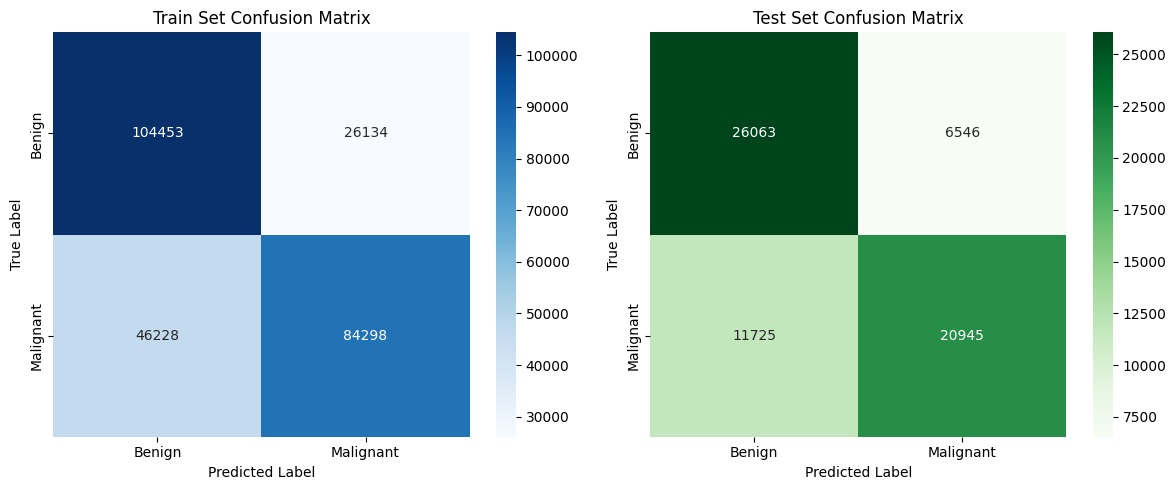

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Class labels
labels = ['Benign', 'Malignant']

# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Train set heatmap
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title('Train Set Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Test set heatmap
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title('Test Set Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


# **Visualization of the Models**

In [ ]:
#Result Values
all_results

[           Model Dataset  Accuracy  F1 Score    Recall  Precision
 0  Decision Tree   Train  0.844895  0.844893  0.844895   0.844912
 1  Decision Tree    Test  0.702967  0.702938  0.702967   0.703036,
            Model Dataset  Accuracy  F1 Score    Recall  Precision
 0  Decision Tree   Train  0.844895  0.844893  0.844895   0.844912
 1  Decision Tree    Test  0.703427  0.703401  0.703427   0.703487,
            Model Dataset  Accuracy  F1 Score    Recall  Precision
 0  Random Forest   Train  0.844864  0.844730  0.844864   0.846069
 1  Random Forest    Test  0.715314  0.715092  0.715314   0.715951,
                Model Dataset  Accuracy  F1 Score    Recall  Precision
 0  Gradient Boosting   Train  0.722875  0.721225  0.722875   0.728252
 1  Gradient Boosting    Test  0.720109  0.718363  0.720109   0.725817,
      Model Dataset  Accuracy  F1 Score    Recall  Precision
 0  XGBoost   Train  0.736126  0.735206  0.736126   0.739431
 1  XGBoost    Test  0.727523  0.726549  0.727523   0.7308

In [ ]:
#Tabulated Results
for df in all_results:
    numeric_cols = df.select_dtypes(include=['number']).columns
    df[numeric_cols] = df[numeric_cols].round(2)  # Round numeric values to 3 places

for df in all_results:
    display(df)

,Model,Dataset,Accuracy,F1 Score,Recall,Precision
0,Decision Tree,Train,0.84,0.84,0.84,0.84
1,Decision Tree,Test,0.70,0.70,0.70,0.70


,Model,Dataset,Accuracy,F1 Score,Recall,Precision
0,Decision Tree,Train,0.84,0.84,0.84,0.84
1,Decision Tree,Test,0.70,0.70,0.70,0.70


,Model,Dataset,Accuracy,F1 Score,Recall,Precision
0,Random Forest,Train,0.84,0.84,0.84,0.85
1,Random Forest,Test,0.72,0.72,0.72,0.72


,Model,Dataset,Accuracy,F1 Score,Recall,Precision
0,Gradient Boosting,Train,0.72,0.72,0.72,0.73
1,Gradient Boosting,Test,0.72,0.72,0.72,0.73


,Model,Dataset,Accuracy,F1 Score,Recall,Precision
0,XGBoost,Train,0.74,0.74,0.74,0.74
1,XGBoost,Test,0.73,0.73,0.73,0.73


,Model,Dataset,Accuracy,F1 Score,Recall,Precision
0,LightGBM,Train,0.73,0.73,0.73,0.73
1,LightGBM,Test,0.72,0.72,0.72,0.73


,Model,Dataset,Accuracy,F1 Score,Recall,Precision
0,AdaBoost,Train,0.72,0.72,0.72,0.73
1,AdaBoost,Test,0.72,0.72,0.72,0.73


,Model,Dataset,Accuracy,F1 Score,Recall,Precision
0,StochasticGB,Train,0.72,0.72,0.72,0.73
1,StochasticGB,Test,0.72,0.72,0.72,0.73


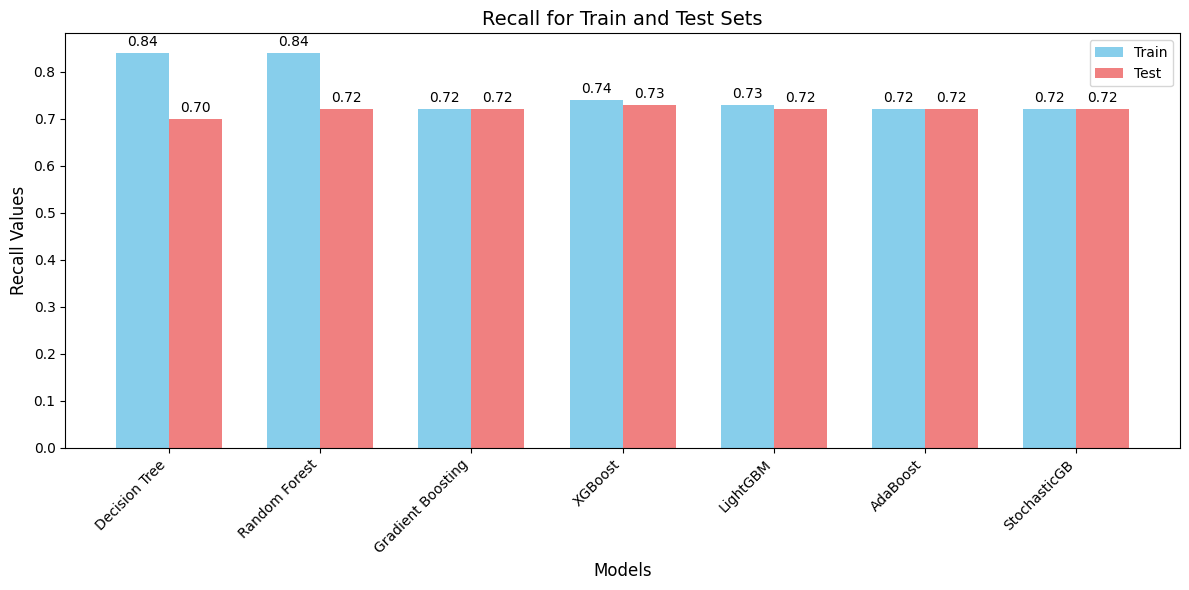

In [ ]:
#Visualization of the Results
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Concatenate all DataFrames in all_results into a single DataFrame
df_results = pd.concat(all_results, ignore_index=True)

# Extract recall values for train and test sets
train_recalls = df_results[df_results['Dataset'] == 'Train']['Recall'].values
test_recalls = df_results[df_results['Dataset'] == 'Test']['Recall'].values
model_names = df_results[df_results['Dataset'] == 'Train']['Model'].values

# Set up the bar graph
bar_width = 0.35
index = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(index, train_recalls, bar_width, label='Train', color='skyblue')
rects2 = ax.bar(index + bar_width, test_recalls, bar_width, label='Test', color='lightcoral')

# Customize the graph
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Recall Values', fontsize=12)
ax.set_title('Recall for Train and Test Sets', fontsize=14)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.legend()

# Add value labels to the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()

# User Interface

In [126]:
pip install xgboost gradio pandas scikit-learn


In [127]:
import gradio as gr
import pandas as pd
import random
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Define encoding maps for categorical features
country_map = {1: "Russia", 2: "Germany", 3: "Nigeria", 4: "India", 5: "UK", 6: "South Korea", 7: "Brazil", 8: "China", 9: "Japan", 10: "USA"}
gender_map = {1: "Female", 2: "Male"}
ethnicity_map = {1: "Caucasian", 2: "Hispanic", 3: "Asian", 4: "African", 5: "Middle Eastern"}
thyroid_risk_map = {1: "Low", 2: "Medium", 3: "High"}
yes_no_map = {1.0: "Yes", 0.0: "No"}
diagnosis_map = {1: "Malignant", 0: "Benign"}

target_column = 'Diagnosis'

# Encode target if it's categorical
label_encoder = LabelEncoder()
df_balanced[target_column] = label_encoder.fit_transform(df_balanced[target_column])

# Split data
X = df_balanced.drop(columns=[target_column])
y = df_balanced[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Function to decode feature values
def decode_feature_value(feature, value):
    if feature == 'Country':
        return country_map.get(value, value)
    elif feature == 'Gender':
        return gender_map.get(value, value)
    elif feature == 'Ethnicity':
        return ethnicity_map.get(value, value)
    elif feature == 'Thyroid_Cancer_Risk':
        return thyroid_risk_map.get(value, value)
    elif feature == 'Radiation_Exposure':
        return yes_no_map.get(value, value)
    elif feature == 'Iodine_Deficiency':
        return yes_no_map.get(value, value)
    elif feature == 'Smoking':
        return yes_no_map.get(value, value)
    elif feature == 'Obesity':
        return yes_no_map.get(value, value)
    elif feature == 'Diabetes':
        return yes_no_map.get(value, value)
    elif feature in ['TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size', 'Age']:
        return value
    elif feature == 'Diagnosis':
        #return label_encoder.inverse_transform([value])[0]
        return diagnosis_map.get(value,value)
    else:
        return yes_no_map.get(value, value)  # For Yes/No mappings

# Prediction interface function
def predict_random_record():
    # Select a random index
    random_idx = random.randint(0, len(df_balanced) - 1)

    # Get the record's feature values and actual diagnosis
    record = df_balanced.drop(columns=[target_column]).iloc[random_idx]
    actual_value = df_balanced[target_column].iloc[random_idx]

    # Predict using the trained model
    prediction = model.predict([record.values])[0]

    # Decode the labels if they are encoded
    actual_label = decode_feature_value(target_column, actual_value)
    predicted_label = decode_feature_value(target_column, prediction)

    # Check if the prediction is correct
    is_correct = "Correct" if prediction == actual_value else "Incorrect"

    # Create the feature values in a vertical Markdown table format
    feature_values = "| Feature - Value |\n"
    #feature_values += "| --- - --- |\n"
    for col, val in zip(record.index, record.values):
        feature_values += f"| {col} - {decode_feature_value(col, val)} |\n"

    # Format the output to include features, prediction, and actual value
    output_text = f"""
    **Random Record Index**: {random_idx}

    **Feature Values**:
    {feature_values}

    **Actual Diagnosis**: {actual_label}
    **Predicted Diagnosis**: {predicted_label}
    **Prediction Status**: {is_correct}
    """

    return output_text

# Gradio Interface (displaying results sequentially)
demo = gr.Interface(
    fn=predict_random_record,
    inputs=None,
    outputs="text",  # Return output as text to display Markdown formatting
    title="Predicting Thyroid Cancer using XGBoost",
    description="Randomly selects a record from the dataset and checks if our trained XGBoost model predicts the diagnosis correctly.",
    allow_flagging="never"
)

# Launch the app
demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bd760b6f53465e84d6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Conclusion

This study highlights the potential of machine learning models—particularly XGBoost—in accurately predicting thyroid cancer, with a strong emphasis on maximizing recall. Prioritizing recall helps reduce the risk of false negatives, which is critical in medical diagnostics where overlooking a malignant case can have serious consequences. To make the model more accessible and interpretable, we also developed an interactive user interface using Gradio, allowing users to explore individual predictions and better understand the model's decision-making process through real-time feedback and feature value displays.

Looking ahead, we aim to further enhance the model’s performance by training on larger and more diverse datasets to improve its generalizability across different populations and demographics. In addition, we plan to refine the balance between recall and precision, ensuring the system not only captures more true positives but also reduces false alarms. Our ultimate objective is to build a reliable, interpretable, and user-friendly decision-support tool that can assist clinicians in early detection and better management of thyroid cancer.

